In [1]:
import numpy as np
import matplotlib.pyplot as plt

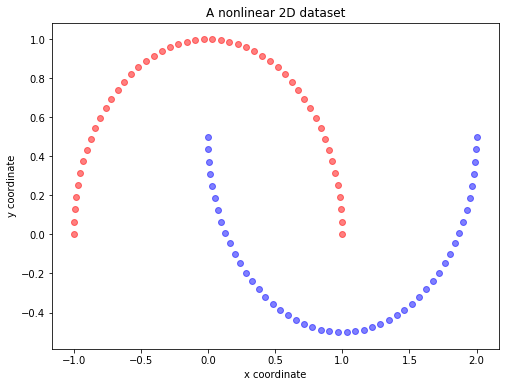

In [11]:
N=50
teta=np.linspace(0,np.pi,num=N).reshape(N,1)
a=np.cos(teta)
b=np.sin(teta)
c=-np.cos(teta)+1
d=-np.sin(teta)+0.5

X_1=np.concatenate((a,b),axis=1)
X_2=np.concatenate((c,d),axis=1)
X=np.concatenate((X_1,X_2),axis=0)


y=np.concatenate((np.zeros((N)),np.ones((N))))


plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0],X[y==0, 1],color='red',alpha=0.5)
plt.scatter(X[y==1, 0],X[y==1, 1],color='blue',alpha=0.5)
plt.title('A nonlinear 2D dataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

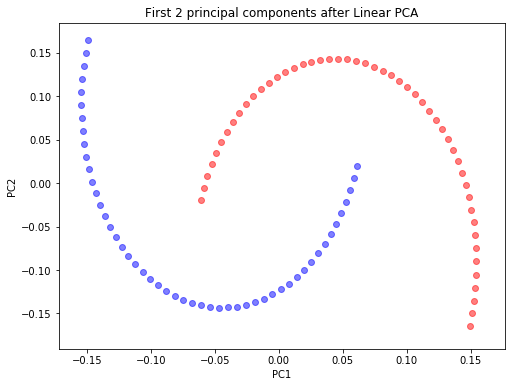

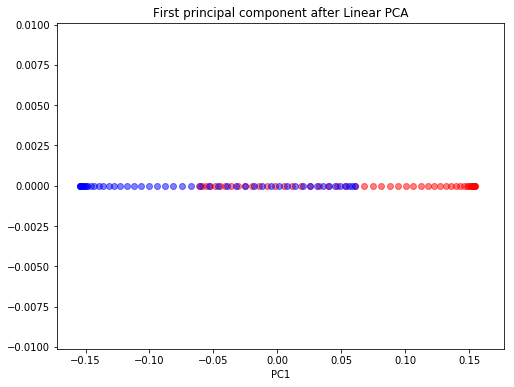

In [12]:
def linear_PCA(X, n_compo):
    for i in range(X.shape[1]):
        X[:,i]-=np.mean(X[:,i])
        
    K=np.matmul(X,np.transpose(X))
            
    eigvals, eigvecs = np.linalg.eig(K)
    X_pc=eigvecs[:,0:n_compo]
    return X_pc

X_pc = linear_PCA(X,2)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0],X_pc[y==0, 1],color='red',alpha=0.5)
plt.scatter(X_pc[y==1, 0],X_pc[y==1, 1],color='blue', alpha=0.5)
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

X_pc = linear_PCA(X,1)
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0],np.zeros((N,1)),color='red',alpha=0.5)
plt.scatter(X_pc[y==1, 0],np.zeros((N,1)),color='blue',alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

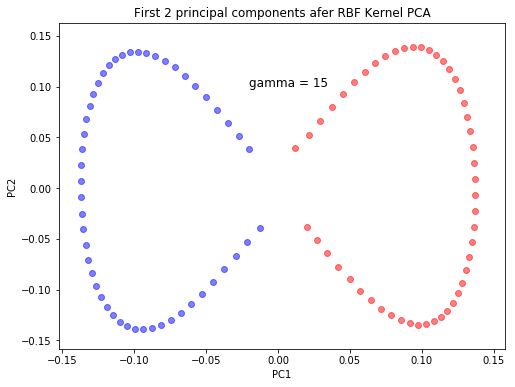

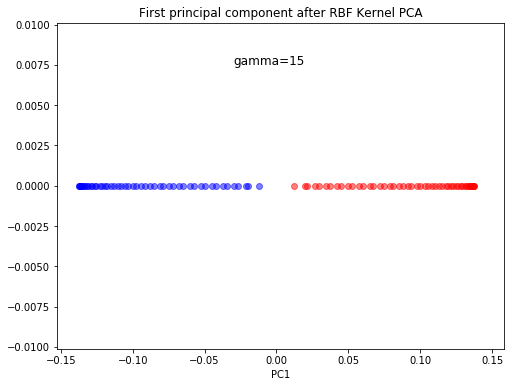

In [13]:
def kernel_PCA(X, n_compo,gamma=15,sigma=1/np.sqrt(2)):
    K=np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            K[i,j]=np.exp(-gamma*np.linalg.norm(X[i,:]-X[j,:])**2/(2*sigma**2))
    
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - 2*np.matmul(one_n,K) + np.matmul(one_n,K,one_n) 
   
    eigvals, eigvecs = np.linalg.eig(K)
    
    X_pc=eigvecs[:,0:n_compo]
    
    return X_pc 

X_pc = kernel_PCA(X,2)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0],X_pc[y==0, 1],color='red',alpha=0.5)
plt.scatter(X_pc[y==1, 0],X_pc[y==1, 1],color='blue',alpha=0.5)
plt.title('First 2 principal components afer RBF Kernel PCA')
plt.text(-0.02,0.10,'gamma = 15',fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

X_pc = kernel_PCA(X,1)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0],np.zeros((N)),color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0],np.zeros((N)),color='blue',alpha=0.5)
plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.03,0.0075,'gamma=15',fontsize=12)
plt.xlabel('PC1')
plt.show()

